In [3]:
import os
import time 
import numpy as np 
import torch
import random
import matplotlib.pyplot as plt
from torch.utils import data
from loader.QSM_data_loader2 import QSM_data_loader2
from utils.data import *
from utils.files import *
from models.unet import Unet

In [ ]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0' 
dataLoader = QSM_data_loader2()
trainLoader = data.DataLoader(dataLoader, batch_size=1, shuffle=False)

In [ ]:
for idx, (input_RDFs, in_loss_RDFs, QSMs, Masks, \
    fidelity_Ws, gradient_Ws, flag_COSMOS) in enumerate(trainLoader):

    input_RDFs = input_RDFs[0, ...]
    in_loss_RDFs = in_loss_RDFs[0, ...]
    QSMs = QSMs[0, ...]
    Masks = Masks[0, ...]
    fidelity_Ws = fidelity_Ws[0, ...]
    gradient_Ws = gradient_Ws[0, ...]
    
    # asarray
    input_RDFs = np.asarray(input_RDFs)
    in_loss_RDFs = np.asarray(in_loss_RDFs)
    QSMs = np.asarray(QSMs)
    Masks = np.asarray(Masks)
    fidelity_Ws = np.asarray(fidelity_Ws)
    gradient_Ws = np.asarray(gradient_Ws)

    print(flag_COSMOS)
    print(input_RDFs.shape)

In [ ]:
# plot
slice_idx = 16
idx_plot = np.random.choice(input_RDFs.shape[0], size=(4, ), replace=False)
plots(input_RDFs[:, 0, ..., slice_idx][idx_plot, ...], rows=1, scale=(-0.1, 0.1))
plots(in_loss_RDFs[:, 0, ..., slice_idx][idx_plot, ...], rows=1, scale=(-0.05, 0.05))
plots(Masks[:, 0, ..., slice_idx][idx_plot, ...], rows=1, scale=(0, 1))
plots(fidelity_Ws[:, 0, ..., slice_idx][idx_plot, ...], rows=1, scale=(0, 1))
plots(QSMs[:, 0, ..., slice_idx][idx_plot, ...], rows=1, scale=(-0.15, 0.15))

In [ ]:
plots(gradient_Ws[:, 0, ..., slice_idx, 0][idx_plot, ...], rows=1, scale=(0, 1))
plots(gradient_Ws[:, 0, ..., slice_idx, 1][idx_plot, ...], rows=1, scale=(0, 1))
plots(gradient_Ws[:, 0, ..., slice_idx, 2][idx_plot, ...], rows=1, scale=(0, 1))

## Plot for adversarial experiments

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
loss = np.load('/data/Jinwei/Bayesian_QSM/loss_ICH_8.npy')
# loss_amort = np.ones(loss.shape) * 15345431.312500  # ICH16
loss_amort = np.ones(loss.shape) * 15388324.500000  # ICH8

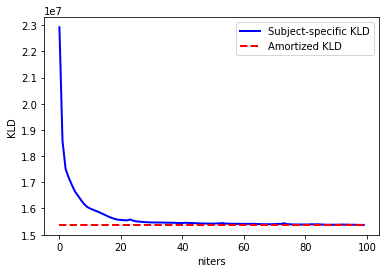

In [31]:
plt.plot(np.arange(100), loss, color='blue', linewidth=2, label='Subject-specific KLD')
plt.plot(np.arange(100), loss_amort, color='red', linewidth=2, linestyle='dashed', label="Amortized KLD")
plt.legend()
plt.ylabel('KLD')
plt.xlabel('niters')
plt.savefig("ich8.jpg", dpi=150)